<a href="https://colab.research.google.com/github/LakshmiAjay/ML-DS/blob/main/5_DT_on_Play_Tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Load libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/College/SEM5/ML/Python Notebook/Tanishq_368/Play Tennis/Play Tennis.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Data Analysis

In [ ]:
len(df)           #Dataset Lenght

14

In [ ]:
df.shape  #To see the number of rows and columns in our dataset

(14, 6)

In [ ]:
df.head()         #To inspect the first five records of the dataset

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
df.tail()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [ ]:
df.describe()     #To see statistical details of the dataset

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


# Preparing the Data (Data Slicing)

In [ ]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
#encode your data
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_out = pd.DataFrame(enc.fit_transform(df[["Outlook"]]).toarray(), columns=['Sunny','Overcast','Rainy'])
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [ ]:
enc_out

,Sunny,Overcast,Rainy
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [ ]:
enc_temp = pd.DataFrame(enc.fit_transform(df[["Temprature"]]).toarray(), columns=['Hot','Mild','Cool'])
enc_hum = pd.DataFrame(enc.fit_transform(df[["Humidity"]]).toarray(), columns=['High','Normal'])
enc_wind = pd.DataFrame(enc.fit_transform(df[["Wind"]]).toarray(), columns=['Weak','Strong'])
enc_play = pd.DataFrame(enc.fit_transform(df[["Play_Tennis"]]).toarray(), columns=['No','Yes'])

In [ ]:
feature = pd.concat([enc_out,enc_temp,enc_hum,enc_wind], axis = 1)

In [ ]:
enc_out

,Sunny,Overcast,Rainy
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [ ]:
feature

,Sunny,Overcast,Rainy,Hot,Mild,Cool,High,Normal,Weak,Strong
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
final_df = df.join(enc_df)

In [ ]:
final_df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis,0,1,2,3,...,16,17,18,19,20,21,22,23,24,25
0,D1,Sunny,Hot,High,Weak,No,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,D2,Sunny,Hot,High,Strong,No,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,D3,Overcast,Hot,High,Weak,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,D4,Rain,Mild,High,Weak,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,D5,Rain,Cool,Normal,Weak,Yes,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,D6,Rain,Cool,Normal,Strong,No,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,D7,Overcast,Cool,Normal,Strong,Yes,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,D8,Sunny,Mild,High,Weak,No,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
8,D9,Sunny,Cool,Normal,Weak,Yes,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,D10,Rain,Mild,Normal,Weak,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


SyntaxError: ignored

In [ ]:
X = enc_df

In [ ]:
#To divide our data into attribute set and Label:
feature_cols = ['Outlook','Temprature','Humidity','Wind']

In [ ]:
cool_co = []

In [ ]:
#contains the attribute
X = df[feature_cols ]

In [ ]:
#contains the label
y = df.Play_Tennis

In [ ]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.30)

# Training and Making Predictions

In [ ]:
# perform training
from sklearn.tree import DecisionTreeClassifier
# import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)
# create a classifier object
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test

,Sunny,Overcast,Rainy,Hot,Mild,Cool,High,Normal,Weak,Strong
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = DataFrame(data_1)
df_1

,state,year,pop
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


In [ ]:
data_2 = {'Sunny' : ['1'], 'Temprature' : ['1'], 'Humidity' : ['0'], 'Wind' : ['0']}
df_2 = DataFrame(data_2)
df_2

,Outlook,Temprature,Humidity,Wind
0,1,1,0,0


In [ ]:
y_pred2= classifier.predict(feature)
y_pred2

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
4,1,1
2,1,1
11,1,0
5,0,1
0,0,0


# Evaluating the Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 1]
 [1 2]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



# Visualizing Decision Trees

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
graph.write_png('Play Tennis.png')

True

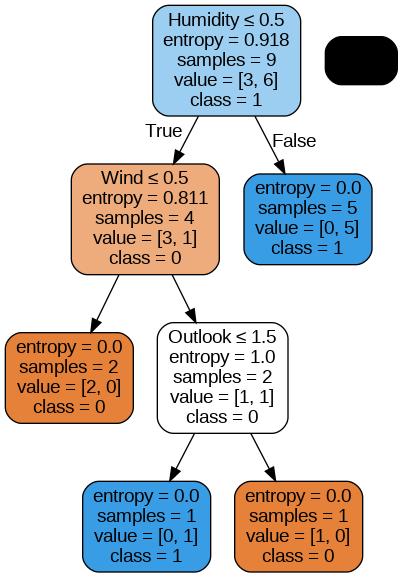

In [ ]:
Image(graph.create_png())

In [ ]:
+